In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import sklearn.datasets
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics

In [10]:
digits = sklearn.datasets.load_digits()
X = digits.data
Y = digits.target

X_train,X_test,Y_train,Y_test = \
sklearn.cross_validation.train_test_split\
(X,Y,test_size = 0.33,random_state = 42)
X_norm = np.mean(X_train,axis=0)
X_train_norm = X_train-X_norm
X_test_norm = X_test-X_norm

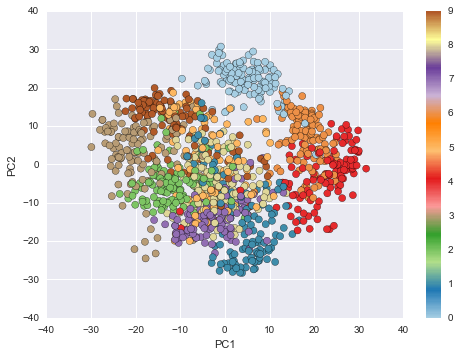

In [19]:
svd = sklearn.decomposition.TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_train_norm)
plt.scatter(X_2d[:,0],X_2d[:,1],c=Y_train,s=50,cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [22]:
k = np.arange(20)+1
parameters = {'n_neighbors':k}
knearest = sklearn.neighbors.KNeighborsClassifier()
clf = sklearn.grid_search.GridSearchCV(knearest,parameters,cv=10)

In [28]:
d = 2
svd = sklearn.decomposition.TruncatedSVD(n_components=d)
X_fit = svd.fit_transform(X_train_norm)
X_fit_atest = svd.transform(X_test_norm)
clf.fit(X_fit,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [ ]:
result = clf.predict(X_fit_atest)
print Y_test
print len(Y_test),